In [213]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [214]:
# obtaining CSV file
uber_data=pd.read_csv("C:/Users/Gajendra/Downloads/archive/My Uber Drives - 2016.csv")

In [215]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [216]:
# Preprocessing of Data
print(uber_data.isnull().sum())
uber_data.head()
uber_data=uber_data.dropna()
len(list(uber_data))


START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


7

In [217]:
#Alterating data and adding columns of HOUR, DAY, MONTH, WEEKDAY, DAY_OF_WEEK
uber_data['START_DATE*']=pd.to_datetime(uber_data['START_DATE*'],format="%m/%d/%Y %H:%M")
uber_data['END_DATE*']=pd.to_datetime(uber_data['END_DATE*'],format="%m/%d/%Y %H:%M")

uber_data['HOUR']=[x.hour for x in uber_data['START_DATE*']]
uber_data['DAY']=[x.day for x in uber_data['START_DATE*']]
uber_data['MONTH']=[x.month for x in uber_data['START_DATE*']]
uber_data['WEEKDAY']=[calendar.day_name[x.dayofweek] for x in uber_data['START_DATE*']]
uber_data['DAY_OF_WEEK']=[x.dayofweek for x in uber_data['START_DATE*']]

In [206]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

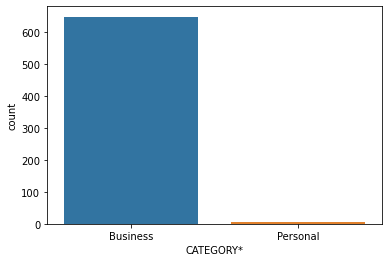

In [180]:
#this plotting comment is used when data is nominal type
sns.countplot(x='CATEGORY*',data=uber_data)

<AxesSubplot:ylabel='Frequency'>

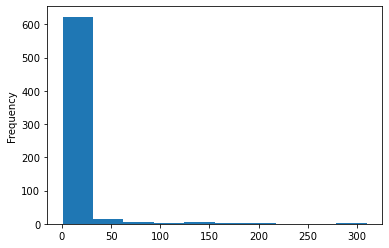

In [181]:
# comment is used when data is numerical
uber_data['MILES*'].plot.hist()

<AxesSubplot:xlabel='count', ylabel='PURPOSE*'>

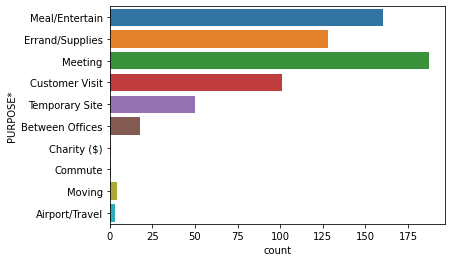

In [182]:
sns.countplot(y='PURPOSE*',data=uber_data)

<AxesSubplot:xlabel='START*', ylabel='count'>

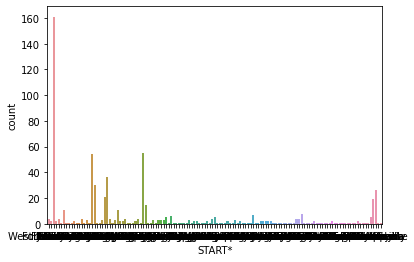

In [183]:
sns.countplot(x='START*',data=uber_data)

Text(0.5, 1.0, 'Number of trips vs hours')

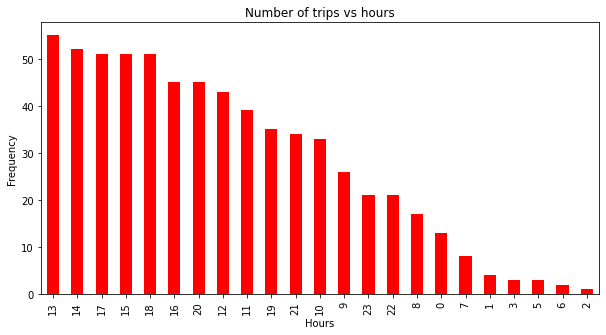

In [184]:
hours=uber_data['HOUR'].value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel("Frequency")
plt.title('Number of trips vs hours')

Text(0.5, 1.0, 'Number of trips vs DAYS')

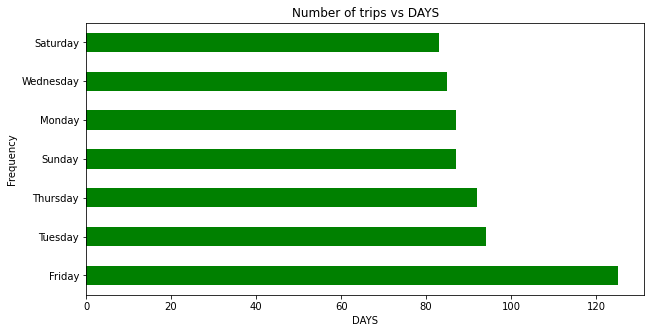

In [185]:
WEEK=uber_data['WEEKDAY'].value_counts()
WEEK.plot(kind='barh',color='GREEN',figsize=(10,5))
plt.xlabel('DAYS')
plt.ylabel("Frequency")
plt.title('Number of trips vs DAYS')

Text(0.5, 1.0, 'Number of trips vs MONTHS')

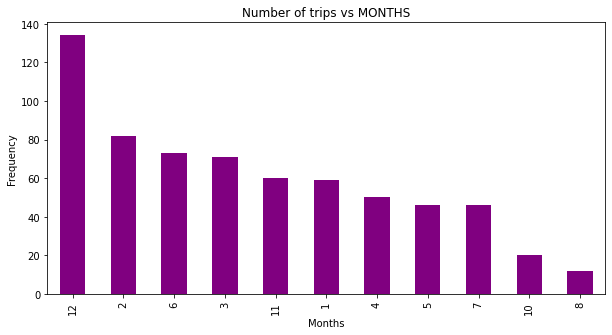

In [186]:
MONTH=uber_data['MONTH'].value_counts()
MONTH.plot(kind='bar',color='PURPLE',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel("Frequency")
plt.title('Number of trips vs MONTHS')

Text(0.5, 1.0, 'Number of trips vs DAYS OF DECEMBER')

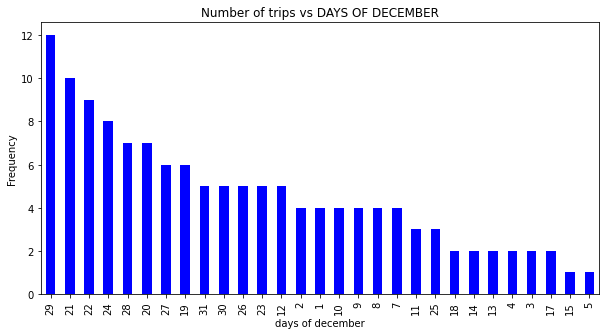

In [187]:
DAYS=uber_data['DAY'][uber_data['MONTH']==12].value_counts()
DAYS.plot(kind='bar',color='BLUE',figsize=(10,5))
plt.xlabel('days of december')
plt.ylabel("Frequency")
plt.title('Number of trips vs DAYS OF DECEMBER')

Text(0.5, 1.0, 'pickup point vs frequency')

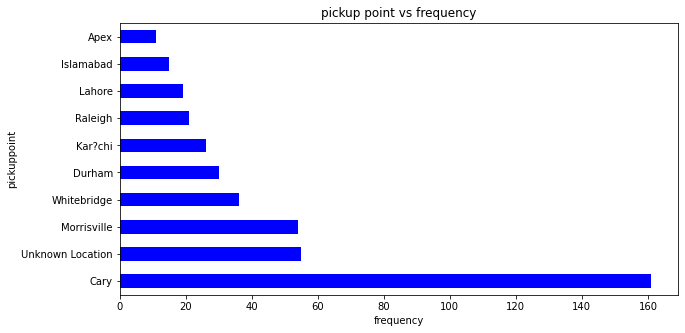

In [188]:
start=uber_data['START*'].value_counts().nlargest(10)
start.plot(kind='barh',color='BLUE',figsize=(10,5))
plt.xlabel('frequency')
plt.ylabel("pickuppoint")
plt.title('pickup point vs frequency')